### РОССИЙСКИЙ УНИВЕРСИТЕТ ДРУЖБЫ НАРОДОВ

#### Факультет физико-математических и естественных наук  
#### Кафедра математического моделирования и искусственного интеллекта

## ОТЧЕТ ПО КОНТРОЛЬНОЙ РАБОТЕ № 2


### Дисциплина: Методы машинного обучения

##### Студент:  Матюшкин Денис Владимирович
##### Группа:   НПИбд-02-21

## Москва 2024
***

### Вариант № 26

Текст задания:
1. Набор данных: forest_fires

2. Независимая переменная: features/FFMC

3. Зависимая переменная: features/ISI

4. Доп. признак: имеющий минимальную ковариацию с независимой переменной

5. Визуализация доп. признака – столбчатая диаграмма

6. Показатель качества регрессии – R^2 (коэффициент детерминации)

7. Степень полинома: 4

8. Параметры глубокой нейронной сети: кол-во скрытых слоев – 5, кол-во нейронов в скрытом слое – 32, функция активации – сигмоида.

### Решение:
1. Загрузите набор данных forest_fires, включая независимый признак features/FFMC и зависимый признак (отклик) features/ISI . Оставьте в наборе признаки, принимающие числовые значения.

Импортируем нобходимые библиотеки:

In [107]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
import tensorflow_datasets as tfds
from mpl_toolkits import mplot3d
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

Считаем из tfds заданный набор данных и преобразуем его в Data Frame:

In [3]:
data_set = tfds.load("forest_fires", split='train')
data_frame = tfds.as_dataframe(data_set)
data_frame.head()

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/517 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/forest_fires/0.0.1.incompleteVS4KH1/forest_fires-train.tfrecord*...:   0%|…

Dataset forest_fires downloaded and prepared to /root/tensorflow_datasets/forest_fires/0.0.1. Subsequent calls will reuse this data.


,area,features/DC,features/DMC,features/FFMC,features/ISI,features/RH,features/X,features/Y,features/day,features/month,features/rain,features/temp,features/wind
0,10.820000,671.200012,181.100006,96.099998,14.300000,63.0,7,5,1,7,6.4,27.299999,4.9
1,24.590000,750.500000,96.699997,90.500000,11.400000,55.0,3,4,6,8,0.0,20.600000,5.4
2,0.170000,607.099976,131.699997,94.300003,22.700001,55.0,6,5,1,7,0.0,19.400000,4.0
3,14.680000,671.200012,181.100006,96.099998,14.300000,27.0,3,4,1,7,0.0,32.299999,2.2
4,88.489998,699.599976,133.300003,92.900002,9.200000,21.0,4,4,2,8,0.0,26.400000,4.5


Все данные являются числовыми, ничего удалять не будем или:

In [4]:
print(data_frame.shape)
data_frame = data_frame.select_dtypes(include=[np.number])
print(data_frame.shape)

(517, 13)
(517, 13)


2. Удалите из набора точки с выбросами при помощи стандартизованной оценки (Z-score) таким образом, чтобы точки с выбросами составляли от 5% до 10% всех точек набора данных. Визуализируйте точки исходного набора данных на плоскости в виде диаграммы рассеяния (ось X – независимый признак, ось Y – зависимый признак), показывая оставленные в наборе точки и удаленные точки разными цветами, подписывая оси и рисунок и создавая легенду.

Расчитаем Z-оценку для каждой точки данных:

In [5]:
z_scores = (data_frame - data_frame.mean()) / data_frame.std()
z_scores[:5]

,area,features/DC,features/DMC,features/FFMC,features/ISI,features/RH,features/X,features/Y,features/day,features/month,features/rain,features/temp,features/wind
0,-0.031848,0.496883,1.096511,0.988263,1.157663,1.146734,1.007337,0.569309,-1.089853,0.230308,21.551411,1.448489,0.492505
1,0.184472,0.816556,-0.221282,-0.026209,0.521625,0.656462,-0.721437,-0.243765,1.322193,0.669677,-0.073197,0.294635,0.771577
2,-0.199154,0.238484,0.325196,0.662184,2.999979,0.656462,0.575144,0.569309,-1.089853,0.230308,-0.073197,0.087974,-0.009824
3,0.028791,0.496883,1.096511,0.988263,1.157663,-1.059490,-0.721437,-0.243765,-1.089853,0.230308,-0.073197,2.309574,-1.014483
4,1.188308,0.611369,0.350178,0.408565,0.039113,-1.427194,-0.289244,-0.243765,-0.607444,0.669677,-0.073197,1.293493,0.269248


Вычислим квантили распределения Z-оценок, т.е. выберем пороги для удаления выбросов:

In [6]:
lower = z_scores.quantile(0.01)
upper = z_scores.quantile(0.995)

In [7]:
size = len(data_frame.columns)
data_frame_out = data_frame[((z_scores >= lower).sum(axis=1)==size) & ((z_scores <= upper).sum(axis=1)==size)]

In [8]:
data_frame_out.shape[0] / data_frame.shape[0] * 100

93.03675048355899

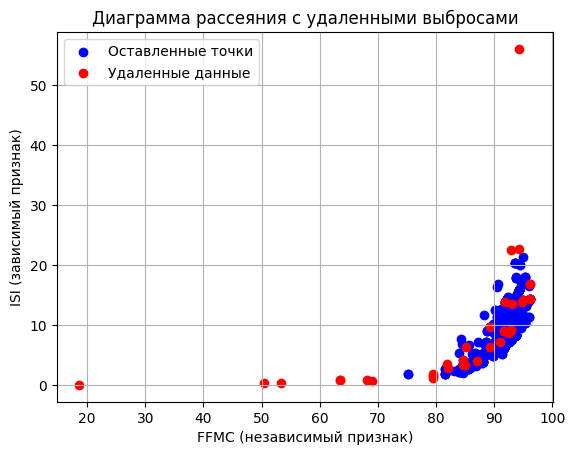

In [9]:
plt.scatter(data_frame_out['features/FFMC'], data_frame_out['features/ISI'], color='blue', label='Оставленные точки')
removed_data = data_frame[~data_frame.index.isin(data_frame_out.index)]
plt.scatter(removed_data['features/FFMC'], removed_data['features/ISI'], color='red', label='Удаленные данные')
plt.xlabel('FFMC (независимый признак)')
plt.ylabel('ISI (зависимый признак)')
plt.title('Диаграмма рассеяния с удаленными выбросами')
plt.legend()
plt.grid(True)
plt.show()

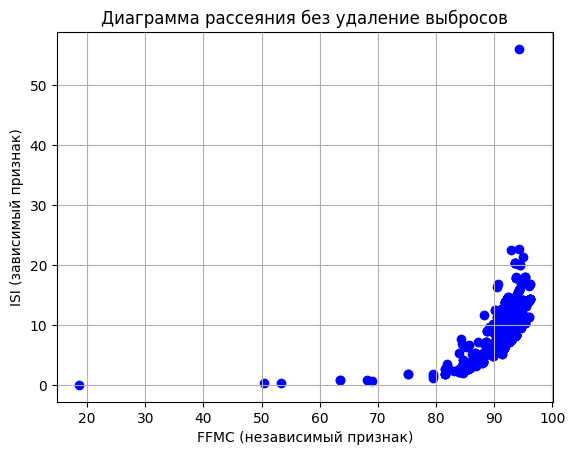

In [10]:
plt.scatter(data_frame['features/FFMC'], data_frame['features/ISI'], color='blue')
plt.xlabel('FFMC (независимый признак)')
plt.ylabel('ISI (зависимый признак)')
plt.title('Диаграмма рассеяния без удаление выбросов')
plt.grid(True)

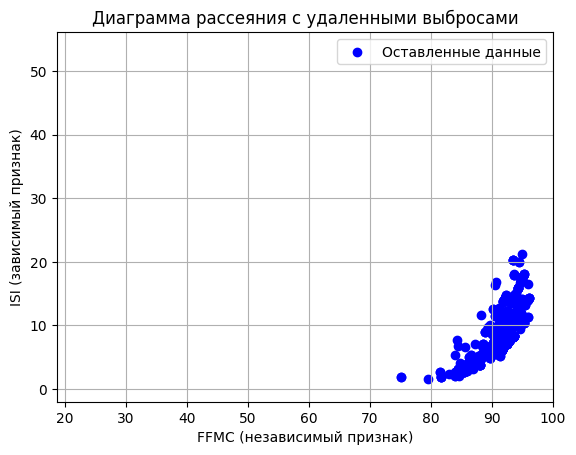

In [11]:
plt.scatter(data_frame_out['features/FFMC'], data_frame_out['features/ISI'], color='blue', label='Оставленные данные')

plt.xlim(data_frame['features/FFMC'].min(), 100)
plt.ylim(-2, data_frame['features/ISI'].max())

plt.xlabel('FFMC (независимый признак)')
plt.ylabel('ISI (зависимый признак)')
plt.title('Диаграмма рассеяния с удаленными выбросами')
plt.legend()
plt.grid(True)
plt.show()

3. Выполните стандартизацию независимого признака и масштабирование на интервал [-1, 1] зависимого признака. Решите задачи линейной регрессии и полиномиальной регрессии для степени полинома, указанной в индивидуальном задании, при помощи нейронных сетей с одним нейроном и оцените качество полученных моделей по показателю, указанному в индивидуальном задании. Отследите обучение нейронных сетей, изменяя, при необходимости, гиперпараметры (функцию потерь, оптимизатор, шаг обучения и т.п.) или применяя регуляризацию.

Text(0.5, 1.0, 'График после преобразования')

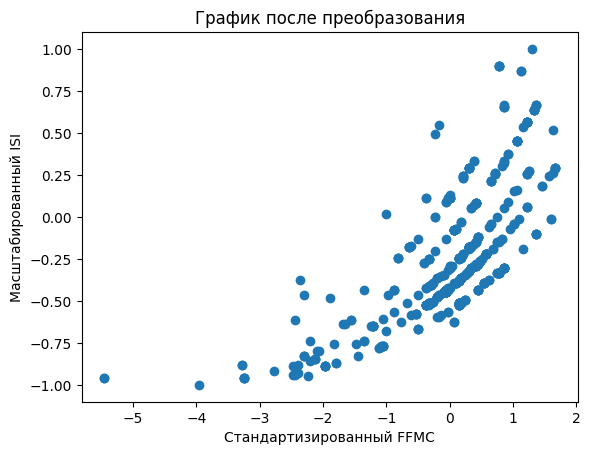

In [12]:
x = data_frame_out['features/FFMC']
y = data_frame_out['features/ISI']

x_s = (x - np.mean(x))/np.std(x)
y_m = -1 + 2 * (y - np.min(y))/(np.max(y) - np.min(y))

plt.scatter(x_s, y_m)
plt.xlabel("Стандартизированный FFMC")
plt.ylabel("Масштабированный ISI")
plt.title("График после преобразования")

**Линейная регрессия**

In [13]:
linear_model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=(1,))
])

linear_model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.25),
    loss=tf.keras.losses.mean_squared_error)

history_line = linear_model.fit(
    x_s, y_m,
    epochs=100,
    verbose=0,
    validation_split = 0.2)

16/16 [==============================] - 0s 2ms/step


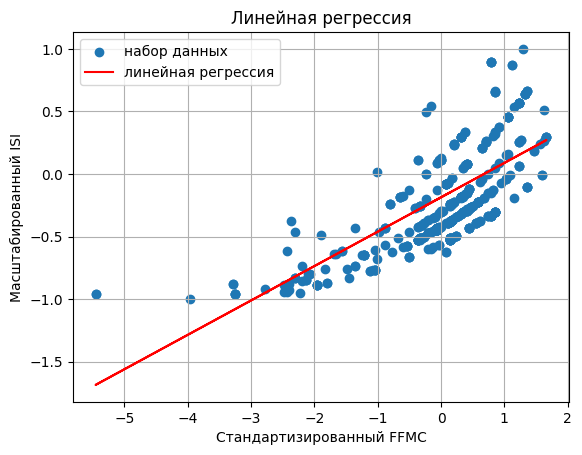

In [14]:
y_predict_line = linear_model.predict(x_s)

plt.scatter(x_s, y_m, label='набор данных')
plt.plot(x_s, y_predict_line, color='r', label='линейная регрессия')
plt.title("Линейная регрессия")
plt.xlabel("Стандартизированный FFMC")
plt.ylabel("Масштабированный ISI")
plt.legend(loc='upper left')
plt.grid();

**Полиномиальная регрессия**

In [15]:
from sklearn.preprocessing import PolynomialFeatures

X_s = np.array(x_s).reshape(-1, 1)
X_poly = np.hstack([X_s, X_s**2, X_s**3, X_s**4,])
# poly = PolynomialFeatures(degree=4)
# poly.fit(x_s)
# X_poly = poly.transform(x_s)
X_poly.shape

(481, 4)

In [16]:
def r2(y_predict):
  Q = np.sum((y_m - y_predict.flatten()) ** 2)
  y_mean = np.mean(y_m)
  S0 = np.sum((y_m - y_mean) ** 2)
  return 1 - (Q / S0)

class Callback(tf.keras.callbacks.Callback):

    def on_epoch_end(self, epoch, logs=None):
      y_predict = self.model.predict(X_poly)
      r2_value = r2(y_predict.flatten())
      print("\nR^2 для текущей эпохи:", r2_value)
      if r2_value > 0.58:
          print("\nДостигнуто значение R^2 > 0.58")
          self.model.stop_training = True


pol_model = tf.keras.Sequential([
    tf.keras.Input(shape=(X_poly.shape[1],)),
    tf.keras.layers.Dense(units=1)
])

pol_model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    loss=tf.keras.losses.mean_squared_error)

callback = Callback()

history_pol = pol_model.fit(
    X_poly, y_m,
    epochs=1000,
    verbose=0,
    validation_split = 0.2,
    callbacks=[callback])

16/16 [==============================] - 0s 1ms/step

R^2 для текущей эпохи: -80.96488952636719
16/16 [==============================] - 0s 1ms/step

R^2 для текущей эпохи: -135.45474243164062
16/16 [==============================] - 0s 2ms/step

R^2 для текущей эпохи: -19.126497268676758
16/16 [==============================] - 0s 1ms/step

R^2 для текущей эпохи: -11.780094146728516
16/16 [==============================] - 0s 2ms/step

R^2 для текущей эпохи: -9.255290031433105
16/16 [==============================] - 0s 12ms/step

R^2 для текущей эпохи: -6.702646255493164
16/16 [==============================] - 0s 9ms/step

R^2 для текущей эпохи: -33.26791000366211
16/16 [==============================] - 0s 3ms/step

R^2 для текущей эпохи: -24.30354881286621
16/16 [==============================] - 0s 5ms/step

R^2 для текущей эпохи: -4.762387752532959
16/16 [==============================] - 0s 2ms/step

R^2 для текущей эпохи: -5.3519697189331055
16/16 [============================

16/16 [==============================] - 0s 1ms/step


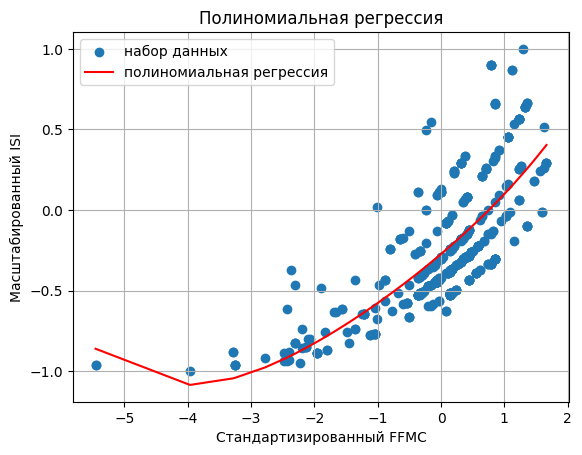

In [17]:
y_predict_pol = pol_model.predict(X_poly)

plt.scatter(x_s, y_m, label='набор данных')
plt.plot(np.sort(x_s), y_predict_pol[np.argsort(x_s)], color='r', label='полиномиальная регрессия')
plt.title("Полиномиальная регрессия")
plt.xlabel("Стандартизированный FFMC")
plt.ylabel("Масштабированный ISI")
plt.legend(loc='upper left')
plt.grid();

Оценим качество полученных моделей по показателю $R^2$:

In [42]:
print("R^2 для линейной регрессии:", r2(y_predict_line))
print("R^2 для полиномиальной регрессия:", r2(y_predict_pol))


R^2 для линейной регрессии: 0.5016050040721893
R^2 для полиномиальной регрессия: 0.5803102552890778


4. Постройте кривые обучения для построенных нейронных сетей с зависимостью от количества эпох. На визуализации создайте легенду.

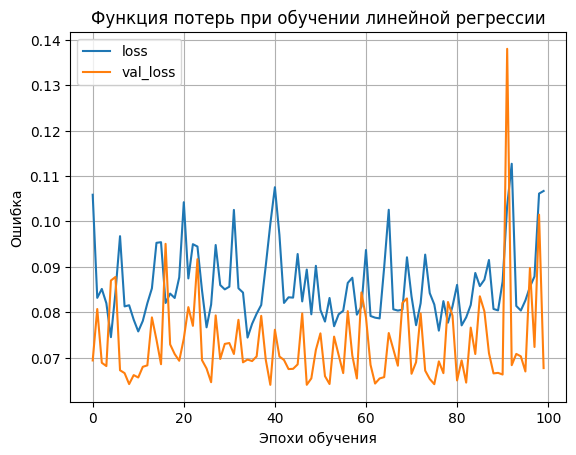

In [19]:
def plot_loss(history, title):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.xlabel('Эпохи обучения')
  plt.ylabel('Ошибка')
  plt.title(title)
  plt.legend()
  plt.grid(True)

plot_loss(history_line, "Функция потерь при обучении линейной регрессии")

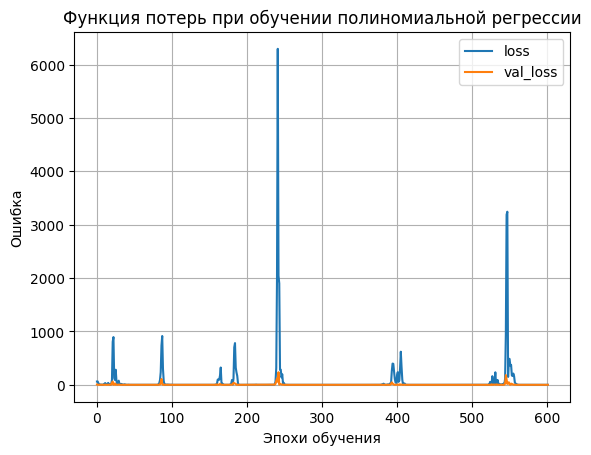

In [20]:
plot_loss(history_pol, "Функция потерь при обучении полиномиальной регрессии")

5. Визуализируйте точки набора данных на плоскости в виде диаграммы рассеяния (ось X – независимый признак, ось Y – зависимый признак), а также линии линейной и полиномиальной регрессий (другими цветами), подписывая оси и рисунок и создавая легенду.

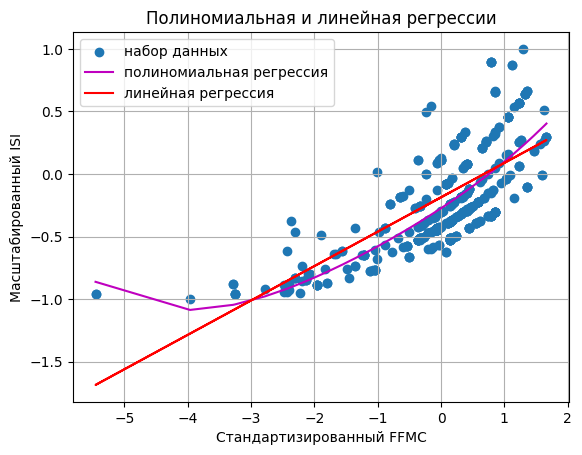

In [21]:
plt.scatter(x_s, y_m, label='набор данных')
plt.plot(np.sort(x_s), y_predict_pol[np.argsort(x_s)], color='m', label='полиномиальная регрессия')
plt.plot(x_s, y_predict_line, color='r', label='линейная регрессия')
plt.title("Полиномиальная и линейная регрессии")
plt.xlabel("Стандартизированный FFMC")
plt.ylabel("Масштабированный ISI")
plt.legend(loc='upper left')
plt.grid();

6. Определите в исходном наборе данных признак (отличный от независимого и зависимого признаков), принимающий непрерывные значения и имеющий свойства, указанные в индивидуальном задании.

In [22]:
covs = {}
for column in data_frame_out.columns:
    if column != 'features/FFMC' and column != 'features/ISI':
        covs[column] = data_frame_out['features/FFMC'].cov(data_frame_out[column])

min_cov_f = min(covs, key=covs.get)
min_cov_v = covs[min_cov_f]

print(covs)
print("Признак с минимальной ковариацией:", min_cov_f)
print("Минимальная ковариация:", min_cov_v)

{'area': 0.7111288248371332, 'features/DC': 315.93582771670333, 'features/DMC': 89.09668512865659, 'features/RH': -11.259227488558071, 'features/X': -0.7219093776129222, 'features/Y': -0.23988099653359035, 'features/day': 0.5324534989196403, 'features/month': 2.18078061300107, 'features/rain': 0.020462399118151956, 'features/temp': 9.161708645662126, 'features/wind': -0.4724773926915268}
Признак с минимальной ковариацией: features/RH
Минимальная ковариация: -11.259227488558071


7. Стандартизуйте этот признак и визуализируйте его в соответствии с индивидуальным заданием.

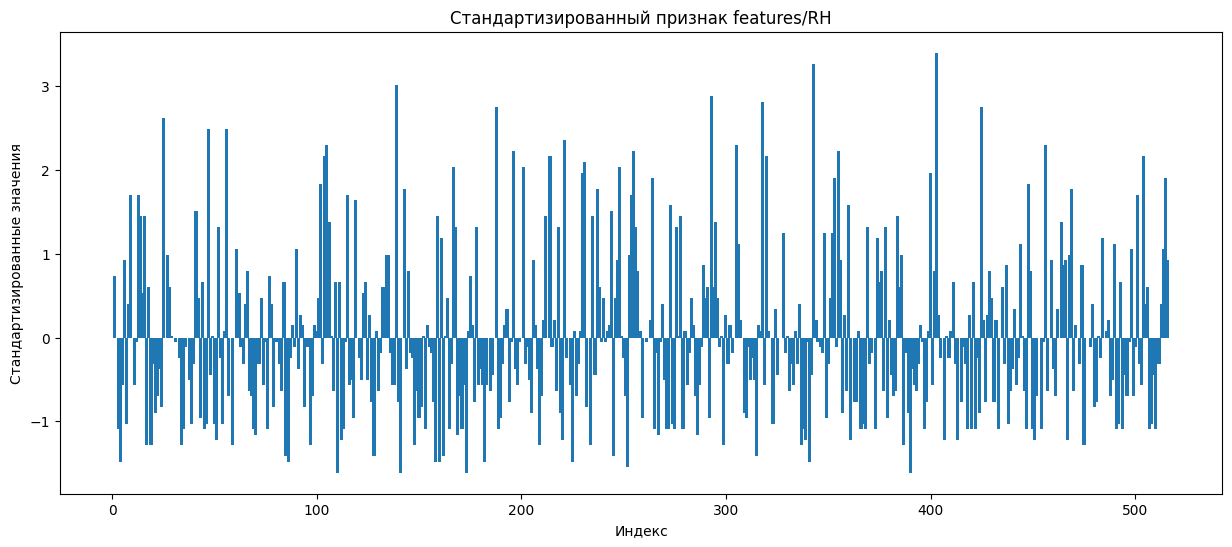

In [23]:
rh = data_frame_out['features/RH']

rh_s = (rh - np.mean(rh))/np.std(rh)
# rh_s = rh_s[::5]
plt.figure(figsize=(15, 6))
plt.bar(rh_s.index, rh_s, width=1.5)
plt.title('Стандартизированный признак features/RH')
plt.xlabel('Индекс')
plt.ylabel('Стандартизированные значения')
plt.show()


8. Сформируйте набор входных данных из двух стандартизованных признаков набора данных (независимый признак и определенный признак), постройте нейронную сеть (нелинейный регресор) с количеством скрытых слоев, количеством нейронов и функцией активации, указанными в индивидуальном задании, и одним нейроном в выходном слое и обучите ее на наборе данных из двух признаков и отклика. Отследите обучение нейронной сети, изменяя, при необходимости, гиперпараметры (функцию потерь, оптимизатор, шаг обучения и т.п.) или применяя регуляризацию.

In [87]:
RH_S = np.array(rh_s).reshape(-1, 1)
X_S =  np.array(x_s).reshape(-1, 1)
x_expanded = np.hstack([X_S, RH_S])
x_expanded.shape

(481, 2)

In [124]:
feature_normalizer = tf.keras.layers.Normalization(axis=None,input_shape=(2,))
feature_normalizer.adapt(x_expanded)

In [148]:
large_model = tf.keras.Sequential([
    feature_normalizer,
    tf.keras.layers.Dense(units=32, activation='sigmoid'),
    tf.keras.layers.Dense(units=32, activation='sigmoid'),
    tf.keras.layers.Dense(units=32, activation='sigmoid'),
    tf.keras.layers.Dense(units=32, activation='sigmoid'),
    tf.keras.layers.Dense(units=32, activation='sigmoid'),
    tf.keras.layers.Dense(units=1)
])

large_model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    loss=tf.keras.losses.mean_squared_error)

history_large = large_model.fit(
    x_expanded, y_m,
    epochs=100,
    verbose=0,
    validation_split = 0.3)

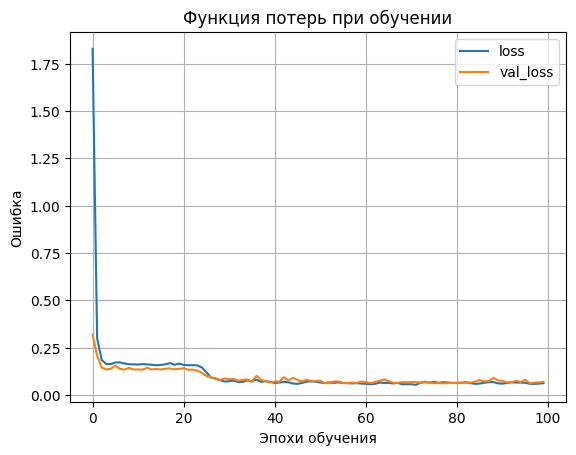

In [150]:
plot_loss(history_large, "Функция потерь при обучении")

In [149]:
score = large_model.predict(x_expanded)
r2_score(y_m,score)

16/16 [==============================] - 0s 2ms/step


0.5849002653895539

9. Визуализируйте набор данных в виде диаграммы рассеяния и прогноз нейронной сети в виде поверхности в трехмерном пространстве, подписывая оси и рисунок.

Подготовим данные:

In [118]:
xs = x_expanded[:,0]
ys = x_expanded[:,1]
zs = y_m
xs.shape, ys.shape, zs.shape

((481,), (481,), (481,))

In [119]:
n_plot = 51

x_plot = np.linspace(np.min(xs), np.max(xs), n_plot)
y_plot = np.linspace(np.min(ys), np.max(ys), n_plot)

In [120]:
x_mesh, y_mesh = np.meshgrid(x_plot, y_plot)
x_mesh.shape, y_mesh.shape

((51, 51), (51, 51))

In [121]:
x_plot2 = np.reshape(x_mesh, [n_plot**2,1])
y_plot2 = np.reshape(y_mesh, [n_plot**2,1])
xy_2 = np.hstack([x_plot2, y_plot2])
xy_2.shape

(2601, 2)

Прогнозируем при помощи обученной ранее модели, после чего вернемся к форме данных 51 на 51:

In [151]:
z = large_model.predict(xy_2)
z.shape

82/82 [==============================] - 0s 2ms/step


(2601, 1)

In [152]:
z_mesh = z.reshape((n_plot, n_plot))
z_mesh.shape

(51, 51)

Визуализируем:

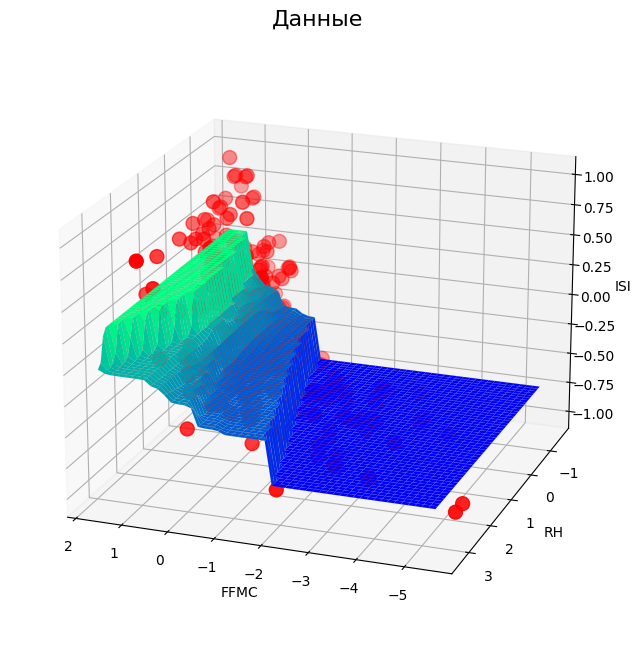

In [170]:
from matplotlib import cm

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

surf = ax.plot_surface(x_mesh, y_mesh, z_mesh, \
       rstride=1, cstride=1, linewidth=0.05, cmap=cm.winter, antialiased=True, \
       edgecolors='gray')
ax.scatter( xs, ys, zs, s=100, c='r' )

ax.set_xlabel('FFMC')
ax.set_ylabel('RH')
ax.set_zlabel('ISI')
ax.set_title('Данные', fontsize=16)

# ax.set_zlim(0., z_mesh.max())
ax.view_init(elev = 20, azim = 110)

10. Разбейте набор данных из двух признаков и отклика на обучающую и тестовую выборки и постройте кривые обучения для заданного показателя качества в зависимости от количества точек в обучающей выборке, подписывая оси и рисунок и создавая легенду.

Разобьем данные:

In [171]:
x_train, x_test, y_train, y_test = train_test_split(x_expanded, y_m, test_size = 0.2)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((384, 2), (97, 2), (384,), (97,))

In [172]:
train_score = []
test_score = []
for i in range(14, 385, 10):
    large_model = tf.keras.Sequential([
      feature_normalizer,
      # tf.keras.layers.Dense(units=32, activation='sigmoid'),
      # tf.keras.layers.Dense(units=32, activation='sigmoid'),
      # tf.keras.layers.Dense(units=32, activation='sigmoid'),
      # tf.keras.layers.Dense(units=32, activation='sigmoid'),
      tf.keras.layers.Dense(units=32, activation='sigmoid'),
      tf.keras.layers.Dense(units=1)
    ])
    large_model.compile(loss='mse')
    large_model.fit(x_train[:i], y_train[:i], epochs=50, verbose=0)

    y_train_predict = large_model.predict(x_train[:i])
    train_score.append(r2_score(y_train[:i], y_train_predict))

    y_test_predict = large_model.predict(x_test)
    test_score.append(r2_score(y_test, y_test_predict))
    print('-->', i, ' done')

4/4 [==============================] - 0s 3ms/step
--> 14  done
4/4 [==============================] - 0s 3ms/step
--> 24  done
4/4 [==============================] - 0s 3ms/step
--> 34  done
4/4 [==============================] - 0s 4ms/step
--> 44  done
4/4 [==============================] - 0s 3ms/step
--> 54  done
4/4 [==============================] - 0s 3ms/step
--> 64  done
4/4 [==============================] - 0s 3ms/step
--> 74  done
4/4 [==============================] - 0s 3ms/step
--> 84  done
4/4 [==============================] - 0s 3ms/step
--> 94  done
4/4 [==============================] - 0s 3ms/step
--> 104  done
4/4 [==============================] - 0s 4ms/step
--> 114  done
4/4 [==============================] - 0s 5ms/step
--> 124  done
4/4 [==============================] - 0s 3ms/step
--> 134  done
4/4 [==============================] - 0s 3ms/step
--> 144  done
4/4 [==============================] - 0s 3ms/step
--> 154  done
4/4 [=============================

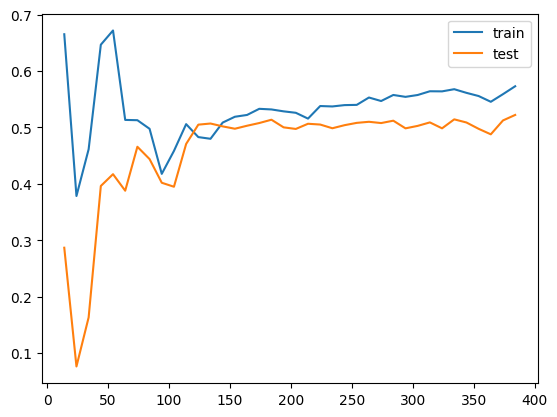

In [173]:
plt.plot([i for i in range(14, len(x_train)+1, 10)],
                               train_score, label="train")
plt.plot([i for i in range(14, len(x_train)+1, 10)],
                               test_score, label="test")
plt.legend();